# [Steel Plate Defect Prediction](https://www.kaggle.com/competitions/playground-series-s4e3)
### Playground Series - Season 4, Episode 3

​
_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:

​
1. [Walter Reade, Ashley Chow. (2024). Steel Plate Defect Prediction. Kaggle.](https://kaggle.com/competitions/playground-series-s4e3)

________________________________________________________________________
•
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/najeebz/defect-prediction-ensemble-xgboost-lgbm-catboost)
- [Github Repository](https://github.com/snajeebz/playground)
•
____________________________________________________________________
# Citation:
​
Najeeb Zaidi. (2024). Steel Plate Defect Prediction. Competition Submission. Kaggle. https://www.kaggle.com/najeebz/defect-prediction-ensemble-xgboost-lgbm-catboost

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from warnings import filterwarnings;
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


# Reading the Dataset

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')

# Initial EDA

In [4]:
df.head(10)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
5,5,1009,1033,899231,899307,409,22,26,47513,86,...,0.5909,-0.1890,0.8749,0,0,0,0,0,0,1
6,6,596,607,739072,7390760,204,21,21,22478,89,...,0.3158,-0.1497,0.5212,0,0,0,0,0,1,0
7,7,1673,1687,294065,294091,571,38,57,53142,77,...,0.0357,-0.2661,0.9408,1,0,0,0,0,0,0
8,8,507,521,203252,203261,101,25,12,12530,124,...,-0.6667,0.0305,0.3601,0,0,0,0,0,0,0
9,9,893,907,1341292,1341296,54,6,15,7052,87,...,0.4667,-0.1228,0.1400,0,0,0,0,0,1,0


In [5]:
df.isnull().sum()


id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [6]:
df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [7]:
test.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [8]:
df.nunique()

id                       19219
X_Minimum                 1191
X_Maximum                 1259
Y_Minimum                 3345
Y_Maximum                 3341
Pixels_Areas              1154
X_Perimeter                460
Y_Perimeter                331
Sum_of_Luminosity         2595
Minimum_of_Luminosity      162
Maximum_of_Luminosity       98
Length_of_Conveyer          99
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       27
Edges_Index               1849
Empty_Index               1748
Square_Index              1118
Outside_X_Index            525
Edges_X_Index             1102
Edges_Y_Index              900
Outside_Global_Index         4
LogOfAreas                1072
Log_X_Index                206
Log_Y_Index                241
Orientation_Index         1598
Luminosity_Index          2046
SigmoidOfAreas             467
Pastry                       2
Z_Scratch                    2
K_Scatch                     2
Stains                       2
Dirtines

In [9]:
train_df=df.copy()

In [10]:
train_df['summary']=train_df['Pastry']+train_df['Z_Scratch']+train_df['K_Scatch']+train_df['Stains']+train_df['Dirtiness']+train_df['Bumps']+train_df['Other_Faults']

In [11]:
train_df['summary'].value_counts()

summary
1    18380
0      818
2       21
Name: count, dtype: int64

There are 21 rows in which we have more than one column True i-e two defects.
and 818 where none of the columns are true, so no defects.

In [12]:
train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']].value_counts()

Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0       0          0         0       0          0      1               6540
                                                1      0               4761
                   1         0       0          0      0               3411
1       0          0         0       0          0      0               1465
0       1          0         0       0          0      0               1150
        0          0         0       0          0      0                818
                             1       0          0      0                568
                             0       1          0      0                485
                   1         0       0          0      1                 18
                                                1      0                  2
1       0          1         0       0          0      0                  1
Name: count, dtype: int64

In [13]:
cat_cols=train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'TypeOfSteel_A300','TypeOfSteel_A300','Outside_Global_Index', 'summary' ]]
num_cols=train_df.drop(columns=['id','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'TypeOfSteel_A300','TypeOfSteel_A300','Outside_Global_Index', 'summary' ])

# Visualizations

# Categorical Columns Count Plots

for col in cat_cols:
   plt.figure(figsize=[15,7])
   sns.countplot(df,x=train_df[col]).set(title= col+' Value Distribution')
   plt.show()

# Numerical Columns Histograms

for col in num_cols:
  plt.figure(figsize=[10,7])
  sns.distplot(train_df[col],kde=True).set(title= col+' Histogram')
  plt.axvline(train_df[col].mean(),color='r', label='Mean')
  plt.axvline(train_df[col].median(),color='y', linestyle='--',label='Median')
  plt.legend()
  plt.show()

# Correlation Plot to assess the correlation between the features

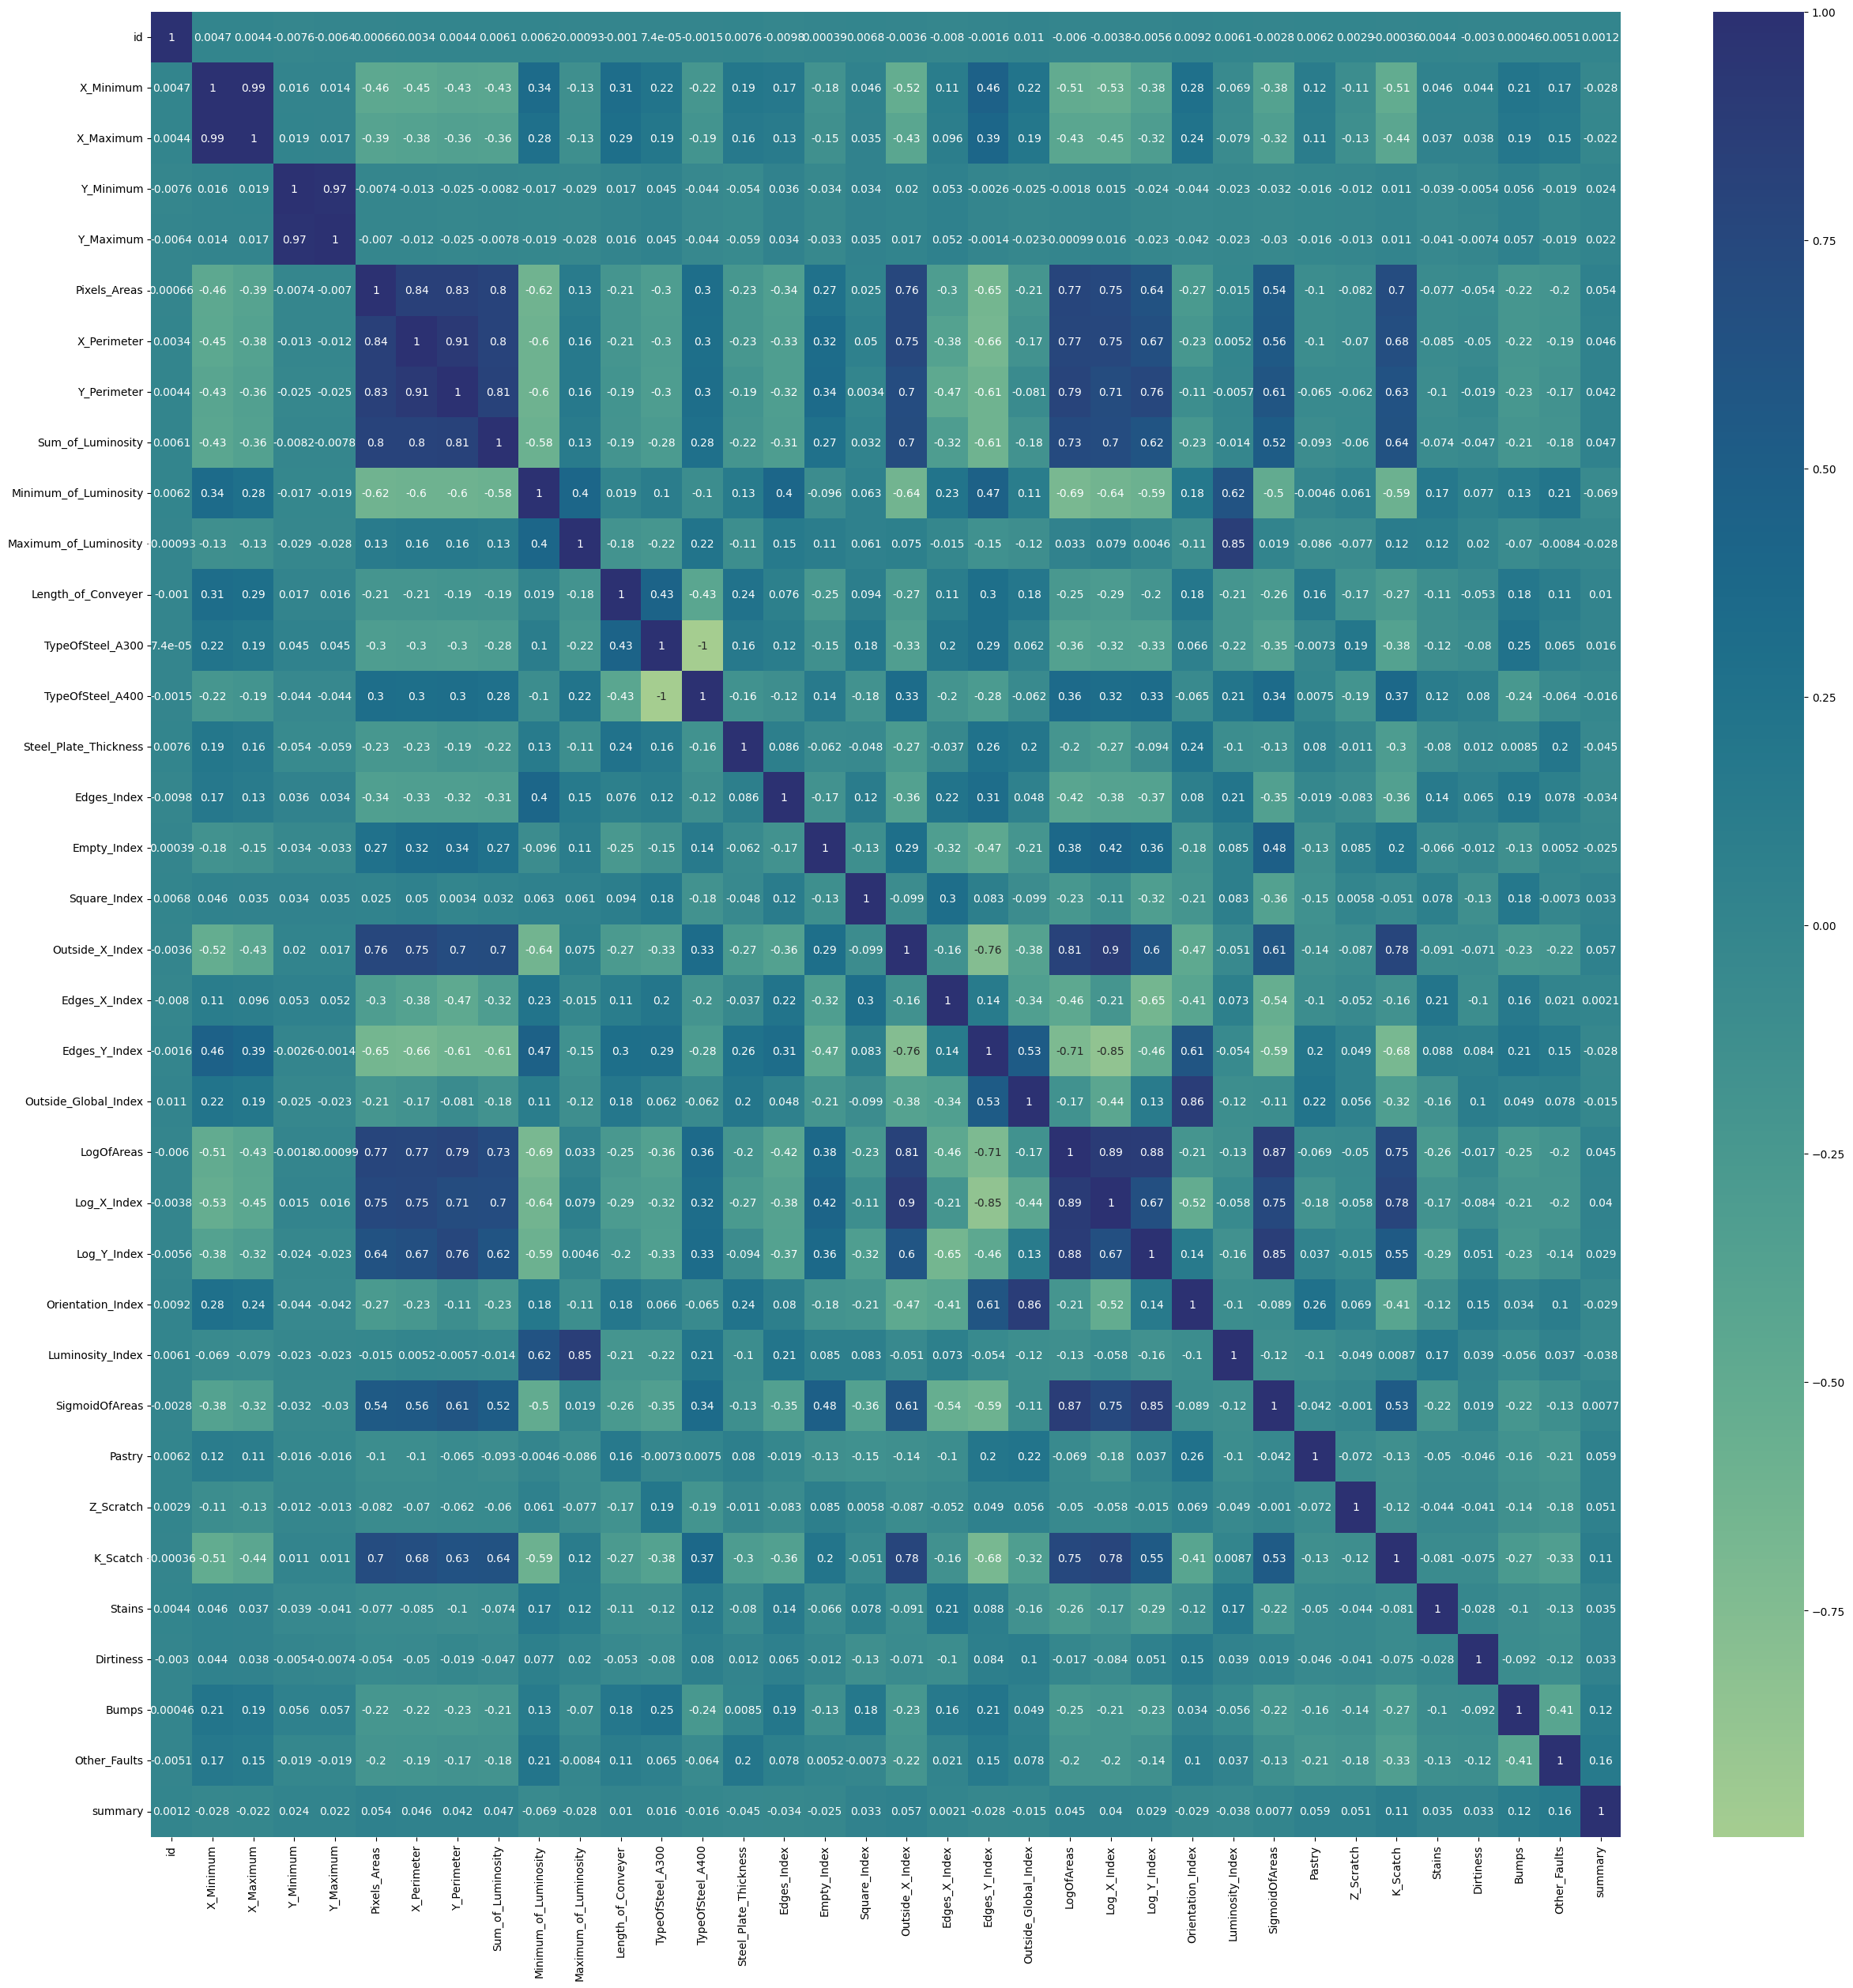

In [14]:
corr = train_df.corr()
# plot the heatmap
plt.figure(figsize=(30,30))
s=sns.heatmap(corr,annot=True, cmap='crest')

# Preparing Testing and Training Datasets.

## Removing the 22 rows with multiple defects


In [15]:
train_df=train_df[train_df['summary']<=1]

In [16]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [17]:
X=train_df.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults','summary' ])
y=train_df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults' ]].idxmax(1)



In [18]:
y.unique()

array(['Stains', 'Other_Faults', 'K_Scatch', 'Bumps', 'Pastry',
       'Z_Scratch', 'Dirtiness'], dtype=object)

# Class Distribution

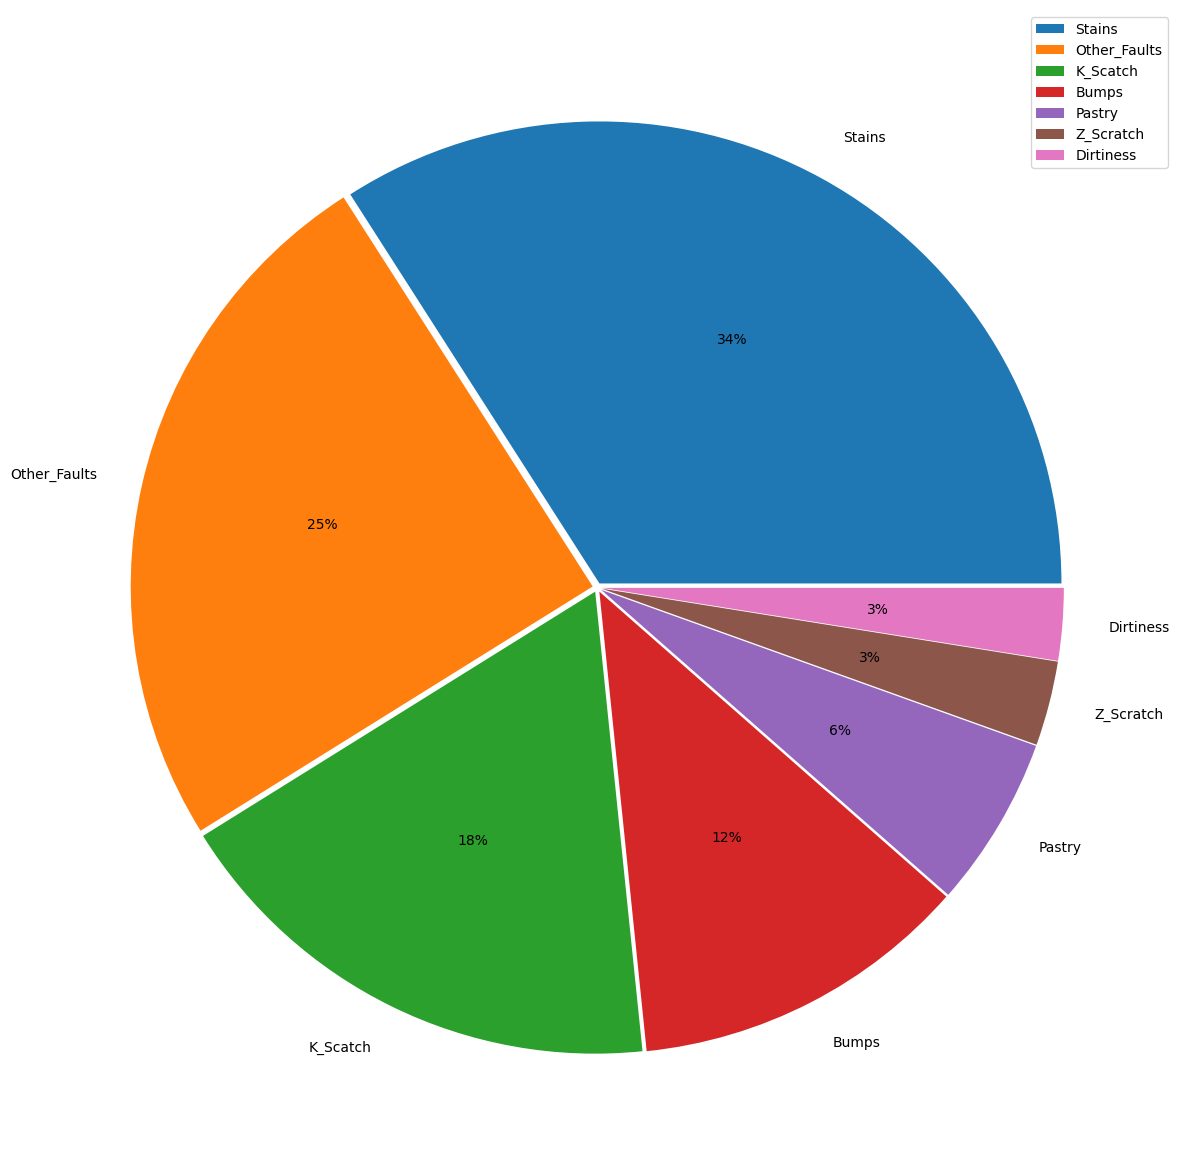

In [19]:
plt.figure(figsize=[15,15])
plt.pie(y.value_counts(), labels=y.unique(), explode=[0.01, 0.01, 0.01, 0.01, 0.01,0.01,0.01], autopct='%.0f%%')
plt.legend()
plt.show()

In [20]:
y = y.map({'Pastry':0, 'Z_Scratch':1,'K_Scatch':2,'Stains':3,'Dirtiness':4,'Bumps':5,'Other_Faults':6})
y.head()

0    3
1    6
2    2
3    2
4    6
dtype: int64

# Generating Class Balancing weights

In [21]:
from sklearn.utils.class_weight import compute_sample_weight
class_weights = compute_sample_weight(class_weight='balanced',y=y)
class_weights

array([4.82847082, 0.41935343, 0.80403736, ..., 1.20130155, 0.41935343,
       0.57604945])

# Creating Testing and Training Datasets

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.9, random_state=42)
X.keys()
test_df=scale(test)

# Tuninig the Hyper Parameters

In [24]:
import optuna
from optuna.integration import CatBoostPruningCallback
#eval_metric='MultiClass',depth=5,l2_leaf_reg=5.3, auto_class_weights='Balanced', bagging_temperature=0.6,
#learning_rate=0.14,iterations=1000,logging_level='Silent'
import catboost as cb
from sklearn.metrics import accuracy_score


def objective(trial: optuna.Trial) -> float:
    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)

    param = {
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 6),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "iterations": trial.suggest_int("iterations", 200, 1000),       
        "used_ram_limit": "20gb",
        "eval_metric": "Accuracy",
        'auto_class_weights':'Balanced'

    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
    gbm.fit(
        train_x,
        train_y,
        eval_set=[(valid_x, valid_y)],
        verbose=0,
        early_stopping_rounds=100,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)

    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
    study.optimize(objective, n_trials=1000, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("   '{}': {},".format(key, value))

[I 2024-03-06 02:35:11,563] A new study created in memory with name: no-name-4016a568-f97c-4779-856f-27265f090c64
[I 2024-03-06 02:35:28,195] Trial 0 finished with value: 0.44895833333333335 and parameters: {'colsample_bylevel': 0.010246897823693162, 'depth': 6, 'l2_leaf_reg': 5.724647875683636, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'learning_rate': 0.08286606921819167, 'iterations': 900}. Best is trial 0 with value: 0.44895833333333335.
[I 2024-03-06 02:35:30,300] Trial 1 finished with value: 0.4947916666666667 and parameters: {'colsample_bylevel': 0.06334117822048041, 'depth': 8, 'l2_leaf_reg': 2.7551829955628673, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'learning_rate': 0.3358224402052849, 'iterations': 886, 'bagging_temperature': 5.519990236802875}. Best is trial 1 with value: 0.4947916666666667.
[I 2024-03-06 02:35:32,914] Trial 2 finished with value: 0.47041666666666665 and parameters: {'colsample_bylevel': 0.01444300405814374, 'depth': 1, 'l2_leaf_r

Number of finished trials: 223
Best trial:
  Value: 0.5425
  Params: 
    colsample_bylevel: 0.09066322441967495
    depth: 8
    l2_leaf_reg: 2.2620384789352235
    boosting_type: Plain
    bootstrap_type: Bernoulli
    learning_rate: 0.23068758799311892
    iterations: 428
    subsample: 0.7469472788760886


In [27]:
import xgboost as xgb
import optuna

import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

def objective(trial):
    (data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)
    param = {
        "verbosity": 0,
        "objective": "multi:softmax",
        # use exact for small dataset.
        "tree_method": trial.suggest_categorical("tree_method",["hist","exact"]),
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),

        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5),
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),       
        "used_ram_limit": "20gb",
        "eval_metric": "mlogloss",
        "num_class":7,
        "sample_weight":class_weights,
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=1000, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    '{}': {},".format(key, value))


[I 2024-03-06 02:48:25,986] A new study created in memory with name: no-name-271e8a7c-9075-4055-8350-6e3bb0d27523
[I 2024-03-06 02:48:26,086] Trial 0 finished with value: 0.8741258741258742 and parameters: {'tree_method': 'exact', 'booster': 'gblinear', 'lambda': 0.07730600493532012, 'alpha': 4.1781278870982884e-05, 'subsample': 0.604390533196397, 'colsample_bytree': 0.49802843397829505, 'learning_rate': 0.23199562211545346, 'n_estimators': 790}. Best is trial 0 with value: 0.8741258741258742.
[I 2024-03-06 02:48:26,186] Trial 1 finished with value: 0.951048951048951 and parameters: {'tree_method': 'hist', 'booster': 'dart', 'lambda': 0.0014186781219689042, 'alpha': 1.4708747948530175e-07, 'subsample': 0.25435467327212136, 'colsample_bytree': 0.3214488673669562, 'learning_rate': 0.22795854537851876, 'n_estimators': 1543, 'max_depth': 9, 'min_child_weight': 8, 'eta': 1.4361941625207983e-06, 'gamma': 0.06282040613296158, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_t

Number of finished trials:  1000
Best trial:
  Value: 1.0
  Params: 
    'tree_method': exact,
    'booster': gbtree,
    'lambda': 7.405008837820739e-07,
    'alpha': 0.0017552335835590825,
    'subsample': 0.9612540042947327,
    'colsample_bytree': 0.28618016044506683,
    'learning_rate': 0.41001640867229683,
    'n_estimators': 1528,
    'max_depth': 5,
    'min_child_weight': 10,
    'eta': 1.015481054699267e-06,
    'gamma': 4.3904677307227446e-05,
    'grow_policy': depthwise,


# Training the Models 
 1. XGBOOST
 1. CATBOOST
 1. LightGBM

In [ ]:
def evaluate(y_test,ypred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred, target_names=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    plt.legend()
    s=sns.heatmap(cm,annot=True, cmap='Reds')

In [ ]:
def Plotlearn(eval,tit,metric):
    plt.plot(eval['validation_0'][metric], label='train')
    plt.plot(eval['validation_1'][metric], label='test')
    plt.legend()
    plt.title(tit)
    plt.show()

In [ ]:
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
import lightgbm as lgb  
xgb.set_config(verbosity=0)
evalset = [(X_train, y_train), (X_test,y_test)]
xgb_model = xgb.XGBClassifier(objective='multi:softmax',tree_method="hist", sample_weight=class_weights,gamma=0.16, max_depth=5,subsample= 0.7, colsample_bytree=0.51,min_child_weight=2,learning_rate=0.01, n_estimaters=1550)
cat_model = CatBoostClassifier(eval_metric='MultiClass',depth=5,l2_leaf_reg=5.3, auto_class_weights='Balanced', bagging_temperature=0.6,learning_rate=0.14,iterations=1000,logging_level='Silent')
lgbm_model = lgb.LGBMClassifier(metric='multi_logloss', boosting_type= "gbdt", sample_weight=class_weights, learning_rate=0.005,n_estimators=800, max_depth=6, num_leaves=252, reg_alpha= 0.002,reg_lambda= 3.5,min_split_gain=0.05,subsample=0.6, verbose=-1)
xgb_model.fit(X_train, y_train, eval_metric='mlogloss', eval_set=evalset, verbose=False)
cat_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train, eval_set=evalset)


# Models Training Charts and Performance

In [ ]:
xbs=float(xgb_model.score(X_test,y_test))
cbs=float(cat_model.score(X_test,y_test))
lbs=float(lgbm_model.score(X_test,y_test))
ms=max(xbs,cbs,lbs)
print('\nXGBoost accuracy: ',xbs)
print('\nCatBoost accuracy: ',cbs)
print('\nLGBM accuracy: ',lbs)

Plotlearn(xgb_model.evals_result(),'XGBoost LogLoss','mlogloss')
metrics = cat_model.eval_metrics(Pool(X_test,y_test), 
                             metrics=['Accuracy'],
                             plot=True)
eval=lgbm_model.evals_result_
plt.plot(eval['training']['multi_logloss'], label='train')
plt.plot(eval['valid_1']['multi_logloss'], label='test')
plt.legend()
plt.title('LightGBM LogLoss')
plt.show()


# Models Evaluation

In [ ]:
print ('XGB Model')
y_pred=xgb_model.predict(X_test)
evaluate(y_test, y_pred)
print ('CatBoost Model')
y_pred=cat_model.predict(X_test)
evaluate(y_test,y_pred)
print ('LightGBM Model')
y_pred=lgbm_model.predict(X_test)
evaluate(y_test,y_pred)

# Predicting the Results

## Ensembling the weighted predictions

In [ ]:
result=pd.DataFrame(data=np.round((((xbs/(3*ms))*xgb_model.predict_proba(test_df))+((cbs/(3*ms))*cat_model.predict_proba(test_df))+((lbs/(3*ms))*lgbm_model.predict_proba(test_df))),1))

In [ ]:
result

# Making the Submission File

In [ ]:
result=result.rename(columns={0:"Pastry",1:"Z_Scratch",2:"K_Scatch",3:"Stains",4:"Dirtiness",5:"Bumps",6:"Other_Faults"})

In [ ]:
submission = pd.DataFrame(result)

In [ ]:
submission.insert(0, 'id', test['id']) 

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission